In [16]:
from sklearn import datasets
iris = datasets.load_iris()
import pandas as pd
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
df = df.drop(df[['sepal length (cm)', 'sepal width (cm)']], axis='columns')


In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['petal width (cm)']])
df[['petal width (cm)']]=scaler.transform([['petal width (cm)']])
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df)
df['cluster'] = y_predict
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(df1[['petal width (cm)']],df1[['petal length (cm)']], color='blue')
plt.scatter(df2[['petal width (cm)']],df2[['petal length (cm)']], color='red')
plt.scatter(df3[['petal width (cm)']],df3[['petal length (cm)']], color='green')


ValueError: could not convert string to float: 'petal width (cm)'

In [39]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
sse

C:\Users\nhame\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[647.055333333333,
 181.02717765894235,
 34.94907979626486,
 21.59808861898335,
 15.69259145299145,
 12.291595426600685,
 10.509329825729822,
 8.638930438842204,
 7.825266934046344]

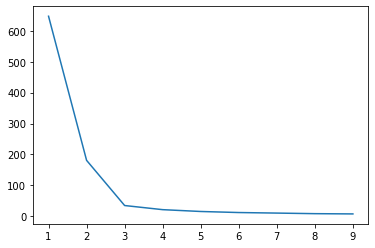

In [40]:
plt.plot(k_range, sse)